In [1]:
import pandas as pd
df = pd.read_csv('dataset_olympics.csv')

In [2]:
# Display the attribute (column) names
print("Attribute names:\n", df.columns)

Attribute names:
 Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


In [3]:
# Display the data types of each column
print("\nData types:\n", df.dtypes)


Data types:
 ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object


In [4]:
# Display the number of attributes (columns) and objects (rows)
print("\nNumber of attributes:", len(df.columns))
print("Number of objects:", len(df))


Number of attributes: 15
Number of objects: 70000


In [8]:
#Calculate missing values
missing_values=df.isna().sum()
print('Missing values in each column')
print(missing_values)
print('\n Total number of missing values :',missing_values.sum())

Missing values in each column
ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

 Total number of missing values : 96397


In [9]:
#make a new column for bmi
df['Height'] = df['Height'] / 100
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
print(df[['Height', 'Weight','Sex','BMI']].head(10))


   Height  Weight Sex        BMI
0    1.80    80.0   M  24.691358
1    1.70    60.0   M  20.761246
2     NaN     NaN   M        NaN
3     NaN     NaN   M        NaN
4    1.85    82.0   F  23.959094
5    1.85    82.0   F  23.959094
6    1.85    82.0   F  23.959094
7    1.85    82.0   F  23.959094
8    1.85    82.0   F  23.959094
9    1.85    82.0   F  23.959094


In [17]:
# Descriptive statistics for numeric values
print(df[['Age','Weight','Height', 'BMI']].describe())

                Age        Weight        Height           BMI
count  67268.000000  52899.000000  53746.000000  52522.000000
mean      25.644645     70.900216      1.755053     22.809656
std        6.485239     14.217489      0.103842      2.939851
min       11.000000     25.000000      1.270000     12.267562
25%       21.000000     61.000000      1.680000     20.957274
50%       25.000000     70.000000      1.750000     22.530864
75%       28.000000     79.000000      1.830000     24.187046
max       88.000000    214.000000      2.230000     63.901580


In [21]:
# Calculate variance for multiple columns
var_values = df[['Age','Weight', 'Height', 'BMI']].var()
print('the variance for age, height, weight and BMI is: \n')
print(var_values)

the variance for age, height, weight and BMI is: 

Age        42.058329
Weight    202.136997
Height      0.010783
BMI         8.642721
dtype: float64


In [22]:
# Print the first 10 rows 
print(df.head(10))

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0    1.80    80.0           China   
1   2                  A Lamusi   M  23.0    1.70    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0    1.85    82.0     Netherlands   
5   5  Christine Jacoba Aaftink   F  21.0    1.85    82.0     Netherlands   
6   5  Christine Jacoba Aaftink   F  25.0    1.85    82.0     Netherlands   
7   5  Christine Jacoba Aaftink   F  25.0    1.85    82.0     Netherlands   
8   5  Christine Jacoba Aaftink   F  27.0    1.85    82.0     Netherlands   
9   5  Christine Jacoba Aaftink   F  27.0    1.85    82.0     Netherlands   

   NOC        Games  Year  Season         City          Sport  \
0  CHN  1992 Summer  1992  Summer    Barcelona     Basketball   
1  CHN  2012 Summer  2

In [43]:
df['ID'] = df['ID'].fillna(-1)

# Fill missing values for numeric columns with their means
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values for categorical columns with their modes
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [37]:
# Display the DataFrame after filling
print('\nDataFrame after replacing missing values:')
print(df)


DataFrame after replacing missing values:
          ID                            Name Sex   Age    Height     Weight  \
0          1                       A Dijiang   M  24.0  1.800000  80.000000   
1          2                        A Lamusi   M  23.0  1.700000  60.000000   
2          3             Gunnar Nielsen Aaby   M  24.0  1.755053  70.900216   
3          4            Edgar Lindenau Aabye   M  34.0  1.755053  70.900216   
4          5        Christine Jacoba Aaftink   F  21.0  1.850000  82.000000   
...      ...                             ...  ..   ...       ...        ...   
69995  35656              Stuart Fitzsimmons   M  19.0  1.755053  70.900216   
69996  35656              Stuart Fitzsimmons   M  19.0  1.755053  70.900216   
69997  35657  David Thomas "Dave" Fitzsimons   M  26.0  1.700000  65.000000   
69998  35657  David Thomas "Dave" Fitzsimons   M  30.0  1.700000  65.000000   
69999  35658                    Marek Fiurek   M  23.0  1.800000  68.000000   

        

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'BMI'}>]], dtype=object)

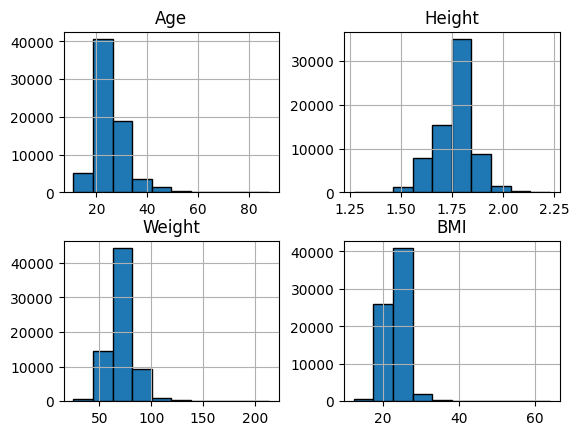

In [44]:
import matplotlib.pyplot as plt

# Specify the columns you want to plot
columns_to_plot = ['Age', 'Height', 'Weight', 'BMI',]

df[columns_to_plot].hist(bins=10, edgecolor='black')
